In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Bowling Analysis (Ball By Ball)/EDA/Bowling Performance Metrics (Ball By Ball).csv')
scaled_df = pd.read_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Bowling Analysis (Ball By Ball)/EDA/Bowling Performance Metrics (Ball By Ball) - Scaled.csv')

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_df)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

cumulative_variance

array([0.35749711, 0.54718444, 0.68816704, 0.79187226, 0.8748851 ,
       0.94350146, 0.99181551, 0.99626303, 0.99854198, 1.        ])

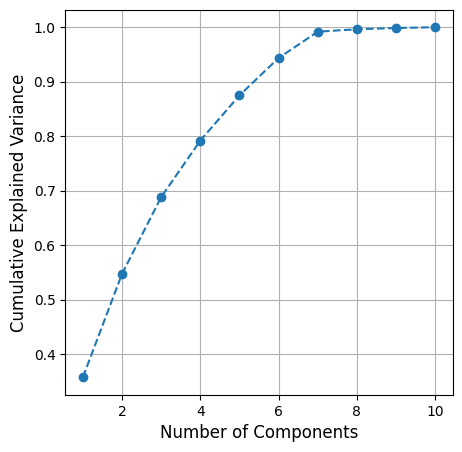

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Variance Explained')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
# plt.title('Cumulative Explained Variance by PCs', fontsize=14)
# plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
pca = PCA(n_components=5)
pca_data = pca.fit_transform(scaled_df)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# def biplot(pca, components=[0, 1]):
#     x_vector = pca.components_[components[0]]
#     y_vector = pca.components_[components[1]]

#     xs = pca_data[:, components[0]]
#     ys = pca_data[:, components[1]]

#     plt.figure(figsize=(20, 10))
#     plt.scatter(xs, ys, alpha=0.5)

#     for i in range(len(x_vector)):
#         plt.arrow(0, 0, x_vector[i] * max(xs), y_vector[i] * max(ys),
#                   color='r', alpha=0.5)
#         plt.text(x_vector[i] * max(xs) * 1.15, y_vector[i] * max(ys) * 1.15,
#                  list(scaled_df.columns.values)[i], color='r', ha='center', va='center')

#     plt.xlabel(f"Principal Component {components[0] + 1}")
#     plt.ylabel(f"Principal Component {components[1] + 1}")
#     plt.title("PCA Biplot")
#     plt.grid(True)
#     plt.show()

# biplot(pca, components=[0, 1])
# biplot(pca, components=[2, 3])
# biplot(pca, components=[3,4])


loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3','PC4','PC5'], index=scaled_df.columns)



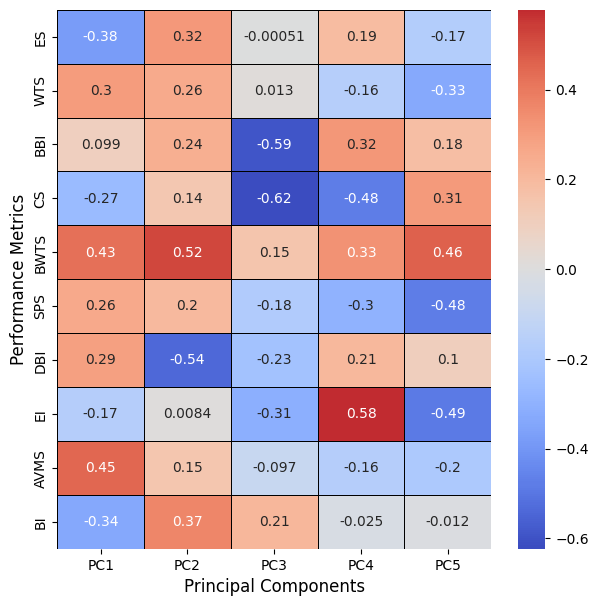

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=scaled_df.columns)

plt.figure(figsize=(7,7))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Performance Metrics', fontsize=12)
# plt.title('Loadings Heatmap', fontsize=14)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

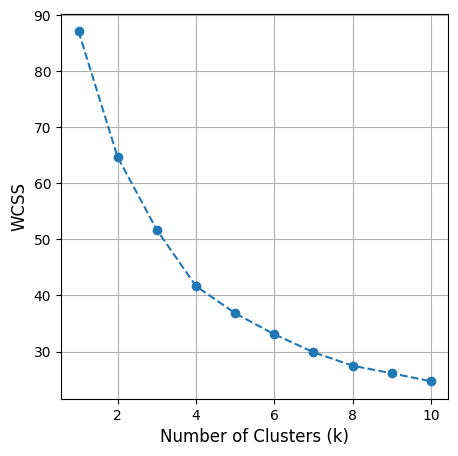

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2','PC3','PC4','PC5'])

wcss = []
k_values = range(1, 11)

for k in k_values:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(pca_df)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(5,5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
# plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

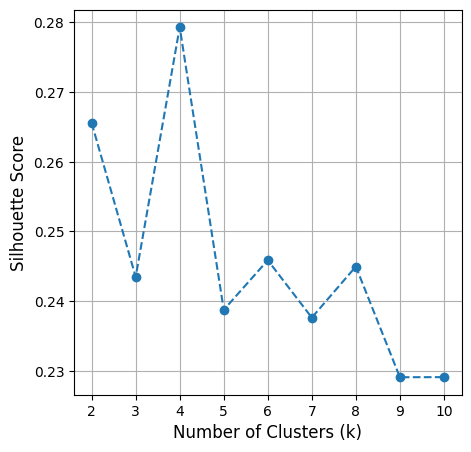

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in k_values[1:]:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(pca_df)
  score = silhouette_score(pca_df, kmeans.labels_)
  sil_scores.append(score)

plt.figure(figsize=(5,5))
plt.plot(k_values[1:], sil_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
# plt.title('Silhouette Score for Optimal Number of Clusters', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
optimal_k = k_values[1:][np.argmax(sil_scores)]

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_df)

df['KCluster'] = clusters
scaled_df['KCluster'] = clusters
pca_df['KCluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


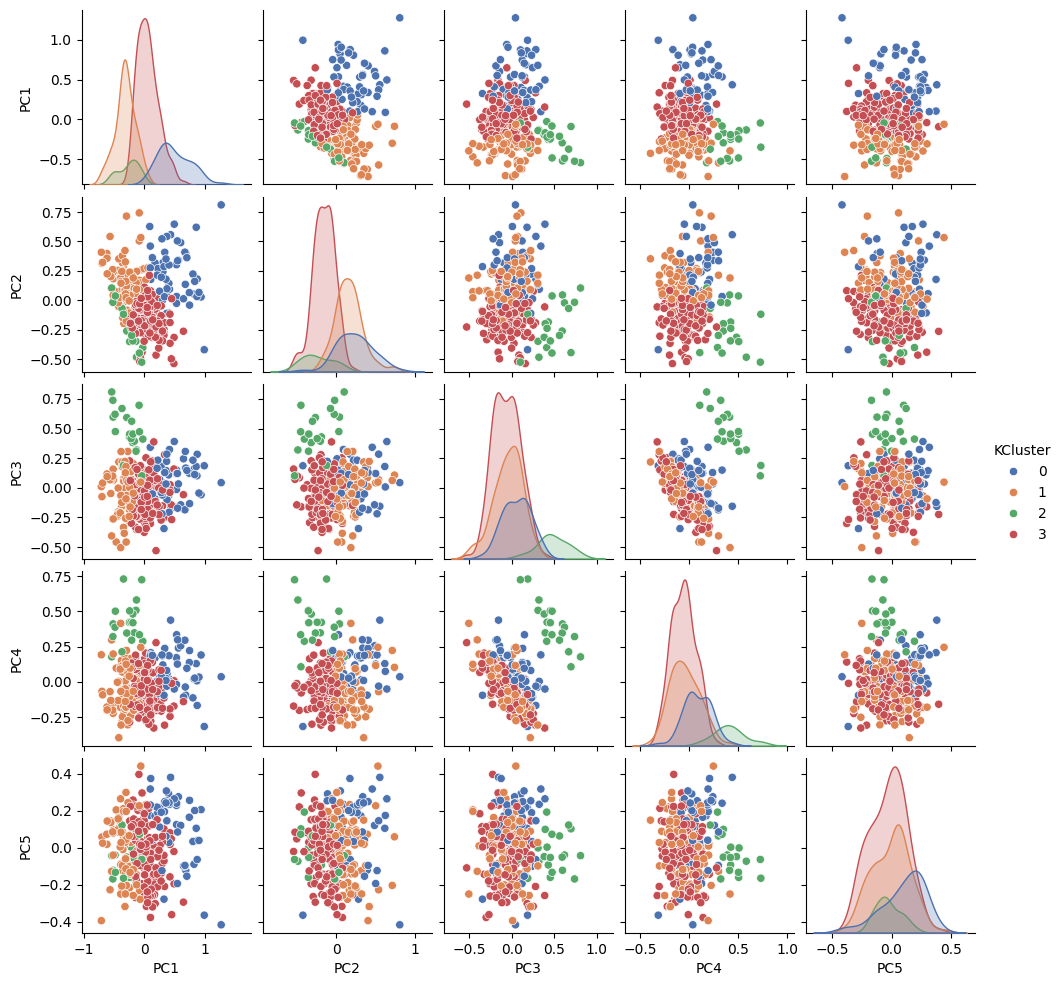

In [ ]:
sns.pairplot(pca_df, hue='KCluster', diag_kind='kde', palette='deep', height=2, aspect=1)
# plt.suptitle('KMeans Clustering for Principal Components', fontsize=14, y=1.02)
plt.show()


In [ ]:
kcluster_means_summary = scaled_df.groupby('KCluster').mean()
kcluster_means_summary.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Bowling Analysis (Ball By Ball)/Analysis (PCA)/KMeans Ball By Ball (PCA) Summary.csv')
kcluster_means_summary

,ES,WTS,BBI,CS,BWTS,SPS,DBI,EI,AVMS,BI
KCluster,,,,,,,,,,
0,0.397527,0.398521,0.535918,0.431454,0.542101,0.367829,0.583955,0.304921,0.493719,0.307830
1,0.677182,0.182090,0.460964,0.714779,0.031188,0.247512,0.367094,0.436402,0.171284,0.549412
2,0.615009,0.000000,0.333667,0.000000,0.000000,0.000000,0.524660,0.443607,0.000000,0.492513
3,0.435936,0.223557,0.437702,0.572371,0.000000,0.310778,0.644196,0.368954,0.287994,0.303622


In [ ]:
kcluster_descriptive = scaled_df.groupby('KCluster').describe()
kcluster_descriptive.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Bowling Analysis (Ball By Ball)/Analysis (PCA)/KMeans Ball By Ball (PCA) Descriptive.csv')
kcluster_descriptive

ES                                                              \
          count      mean       std       min       25%       50%       75%   
KCluster                                                                      
0          54.0  0.397527  0.134746  0.000000  0.295859  0.428639  0.499351   
1          90.0  0.677182  0.095397  0.509878  0.608929  0.662125  0.718934   
2          21.0  0.615009  0.150014  0.383973  0.525169  0.582865  0.784367   
3         143.0  0.435936  0.102328  0.119612  0.367620  0.449556  0.504772   

                      WTS            ...      AVMS               BI            \
               max  count      mean  ...       75%       max  count      mean   
KCluster                             ...                                        
0         0.628192   54.0  0.398521  ...  0.591239  1.000000   54.0  0.307830   
1         1.000000   90.0  0.182090  ...  0.226492  0.381663   90.0  0.549412   
2         0.850026   21.0  0.000000  ...  0.000000  0.000000   21.0  0.492513   
3         0.684867  143.0  0.223557  ...  0.366154  0.664989  143.0  0.303622   

                                                                      
               std       min       25%       50%       75%       max  
KCluster                                                              
0         0.143805  0.000000  0.249697  0.326261  0.397751  0.579719  
1         0.150318  0.175860  0.436872  0.547731  0.663227  0.918868  
2         0.223154  0.218216  0.354484  0.405395  0.688888  1.000000  
3         0.125857  0.000000  0.213537  0.308494  0.382510  0.618933  

[4 rows x 80 columns]

In [ ]:
weights = {
    'WTS': 1,
    'CS': 1,
    'ES': 1,
    'BBI': 1,
    'BWTS': 1,
    'SPS': 1,
    'EI': 1,
    'DBI': 1,
    'AVMS': 1,
    'BI': 1
}

cluster_2_data = scaled_df[clusters==2].copy()
cluster_2_data['Composite Score'] = (
    cluster_2_data['BBI'] * weights['BBI'] +
    cluster_2_data['WTS'] * weights['WTS'] +
    cluster_2_data['CS'] * weights['CS'] +
    cluster_2_data['EI'] * weights['EI'] +
    cluster_2_data['BWTS'] * weights['BWTS'] +
    cluster_2_data['SPS'] * weights['SPS'] +
    cluster_2_data['ES'] * weights['ES'] +
    cluster_2_data['AVMS'] * weights['AVMS'] +
    cluster_2_data['DBI'] * weights['DBI'] +
    cluster_2_data['BI'] * weights['BI']
)

cluster_2_data['Bowler'] = df[clusters==2]['Player'].values
cluster_2_data['Team'] = df[clusters==2]['Team'].values

ranked_kcluster = cluster_2_data[['Bowler', 'Team', 'Composite Score']].sort_values(by='Composite Score', ascending=False)
ranked_kcluster

,Bowler,Team,Composite Score
244,Matthew Swanston,Ryton CC Under 13 Rockets,3.185010
51,Isaac Coy,"Brandon CC, Durham Under 13",3.022787
257,C Cj,Wearmouth & YAV CC Under 13,3.013004
292,Bruce Langlands,Peterlee CC Under 13,2.823837
13,Sam Kirtley,Beamish and E. Stanley CC Under 13,2.788108
16,Harry Fowler,Blaydon CC Under 13,2.690810
234,Lewis Young,Lintz CC Under 13,2.542215
24,Max Wilkinson,"Marsden CC, Tyne & Wear Under 13",2.538899
42,Jack Atkinson,Burnopfield CC Under 13,2.425246
108,T Taylor,Philadelphia CC Under 13,2.392166


In [ ]:
ranked_kcluster['Rank'] = range(1, len(ranked_kcluster) + 1)
ranked_kcluster = ranked_kcluster[['Rank', 'Bowler', 'Team', 'Composite Score']]
ranked_kcluster

,Rank,Bowler,Team,Composite Score
244,1,Matthew Swanston,Ryton CC Under 13 Rockets,3.185010
51,2,Isaac Coy,"Brandon CC, Durham Under 13",3.022787
257,3,C Cj,Wearmouth & YAV CC Under 13,3.013004
292,4,Bruce Langlands,Peterlee CC Under 13,2.823837
13,5,Sam Kirtley,Beamish and E. Stanley CC Under 13,2.788108
16,6,Harry Fowler,Blaydon CC Under 13,2.690810
234,7,Lewis Young,Lintz CC Under 13,2.542215
24,8,Max Wilkinson,"Marsden CC, Tyne & Wear Under 13",2.538899
42,9,Jack Atkinson,Burnopfield CC Under 13,2.425246
108,10,T Taylor,Philadelphia CC Under 13,2.392166


In [ ]:
ranked_kcluster.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Bowling Analysis (Ball By Ball)/Analysis (PCA)/Bowler Ranking KMeans Ball By Ball (PCA).csv', index=False)

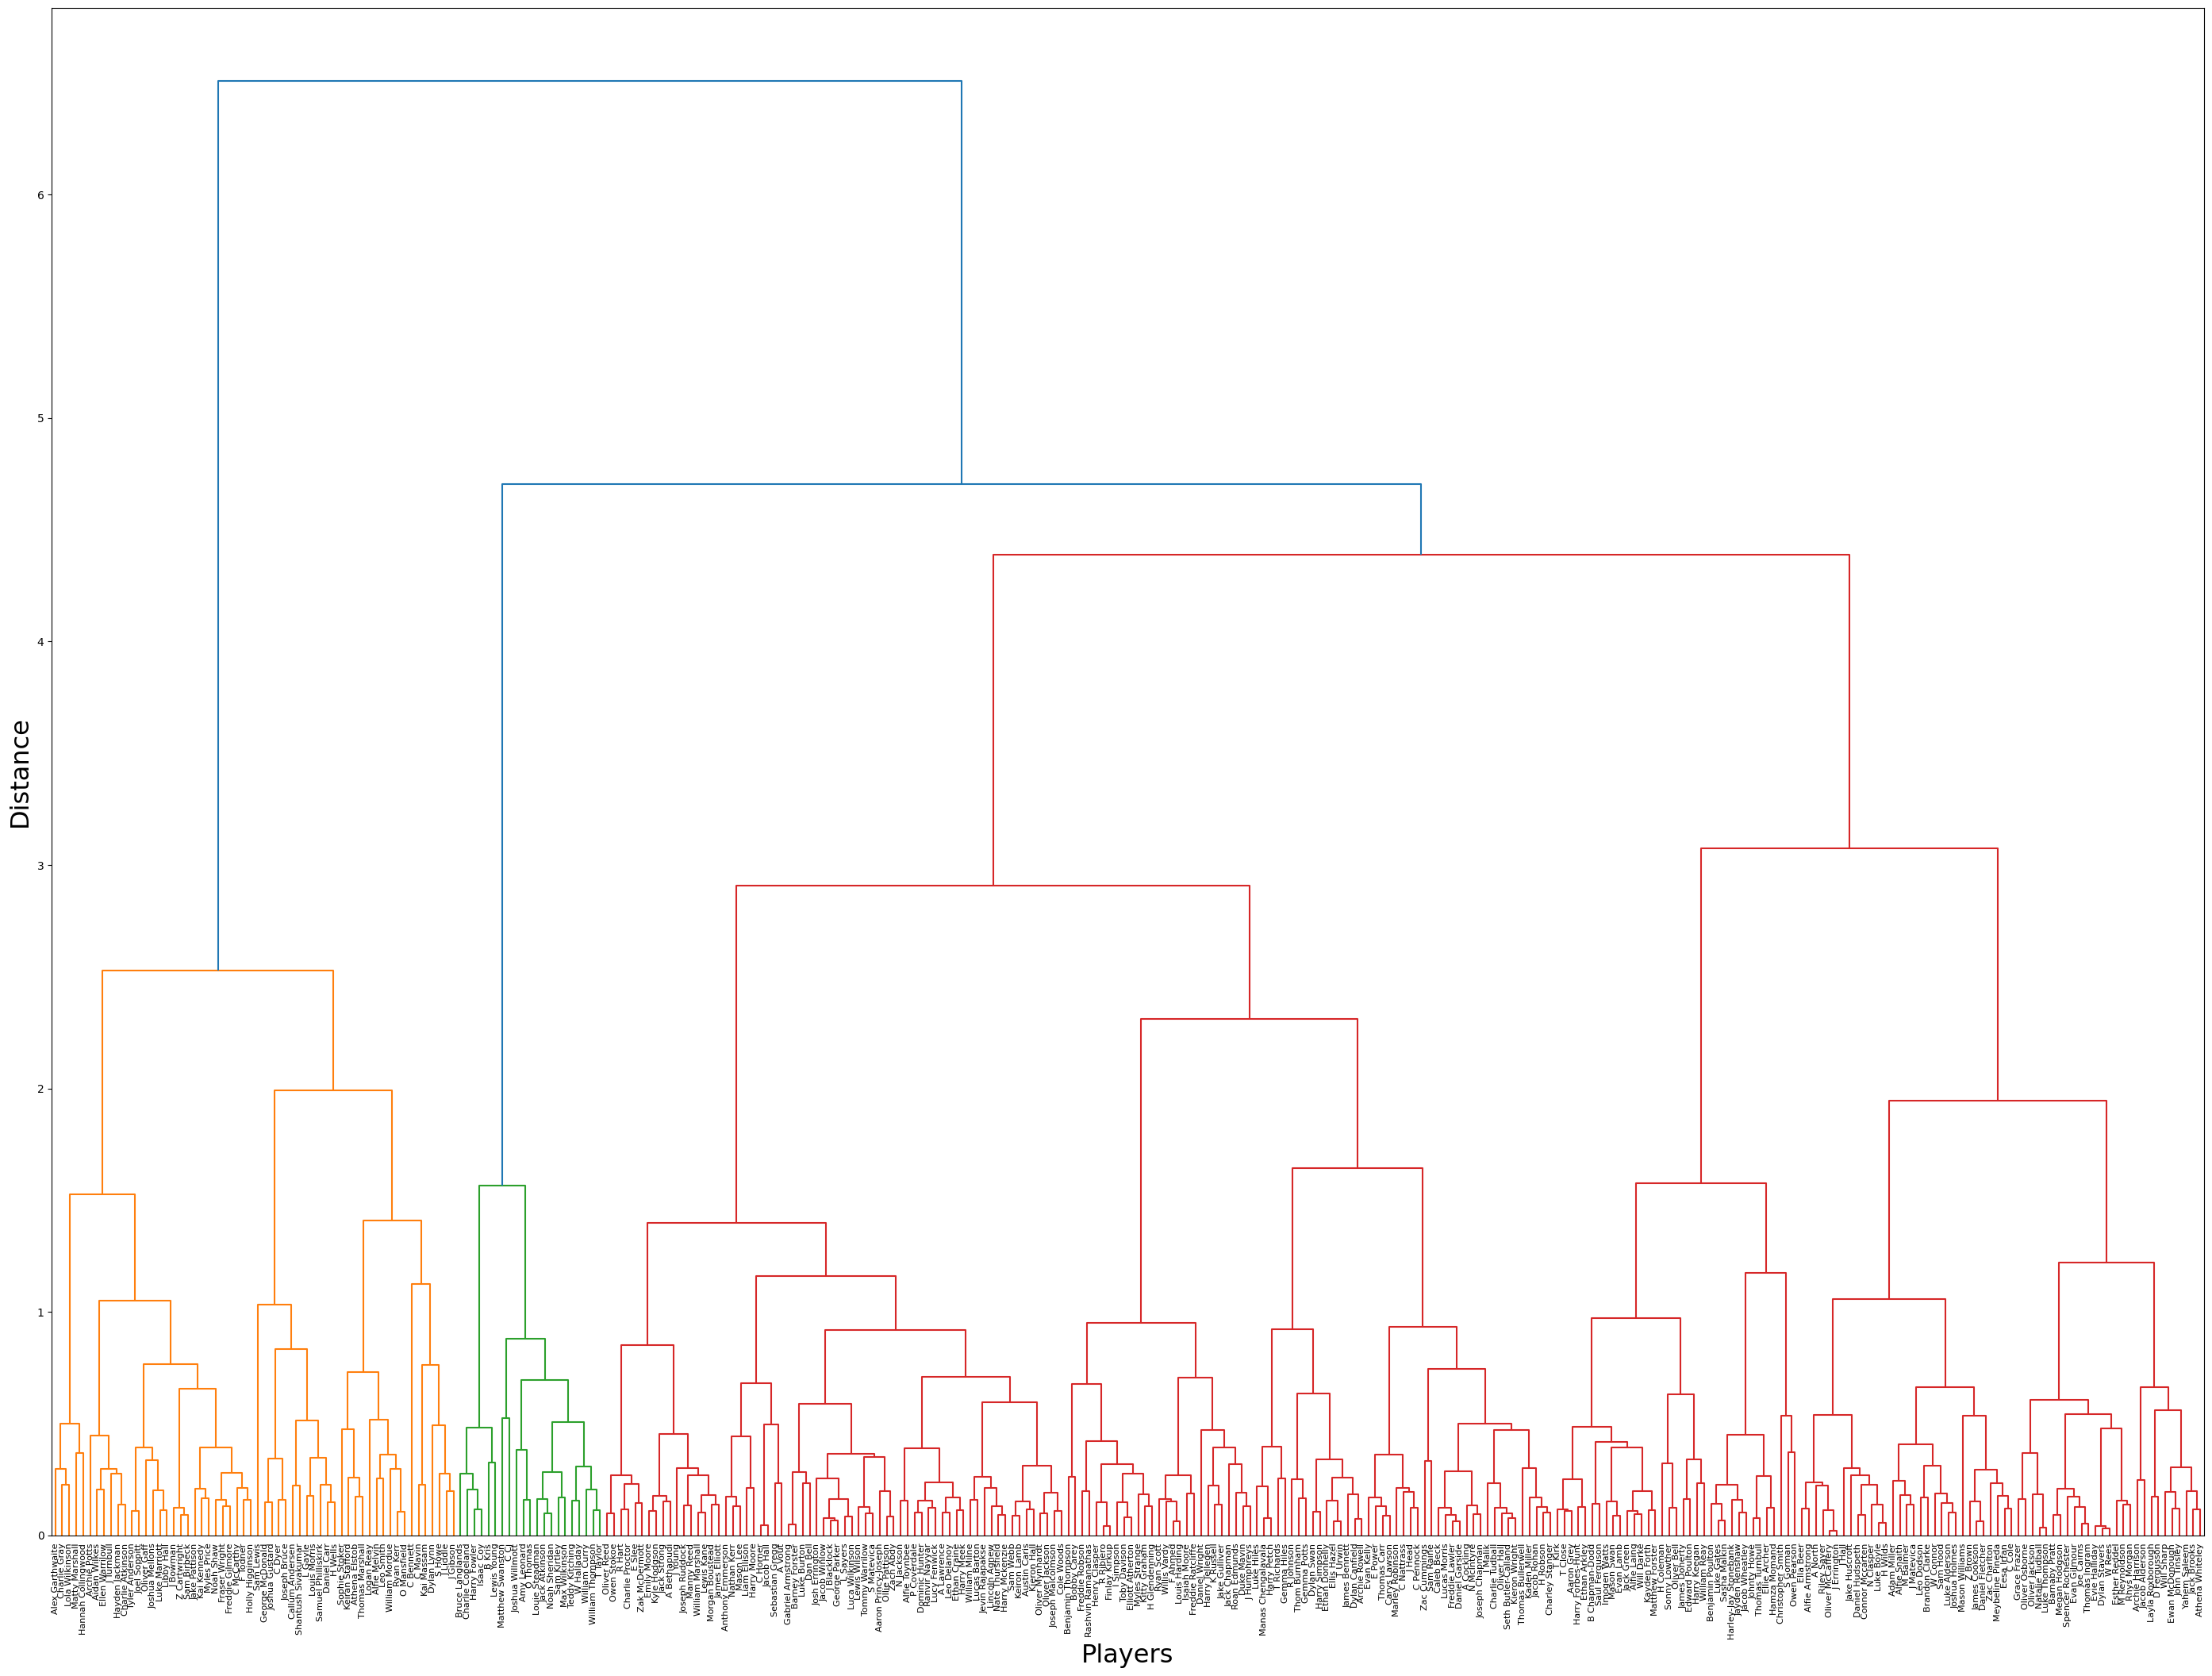

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

h_linkage = linkage(pca_df.drop('KCluster', axis=1), method='ward')

plt.figure(figsize=(35,25))
dendrogram(h_linkage, labels=df['Player'].values, leaf_rotation=90, leaf_font_size=8)
# plt.title('Hierarchical Clustering Dendrgram', fontsize=25)
plt.xlabel('Players', fontsize=23)
plt.ylabel('Distance', fontsize=23)
plt.show()

In [ ]:
h_labels = fcluster(h_linkage, t=4, criterion='distance')

df['Hcluster'] = h_labels
scaled_df['Hcluster'] = h_labels
pca_df['Hcluster'] = h_labels


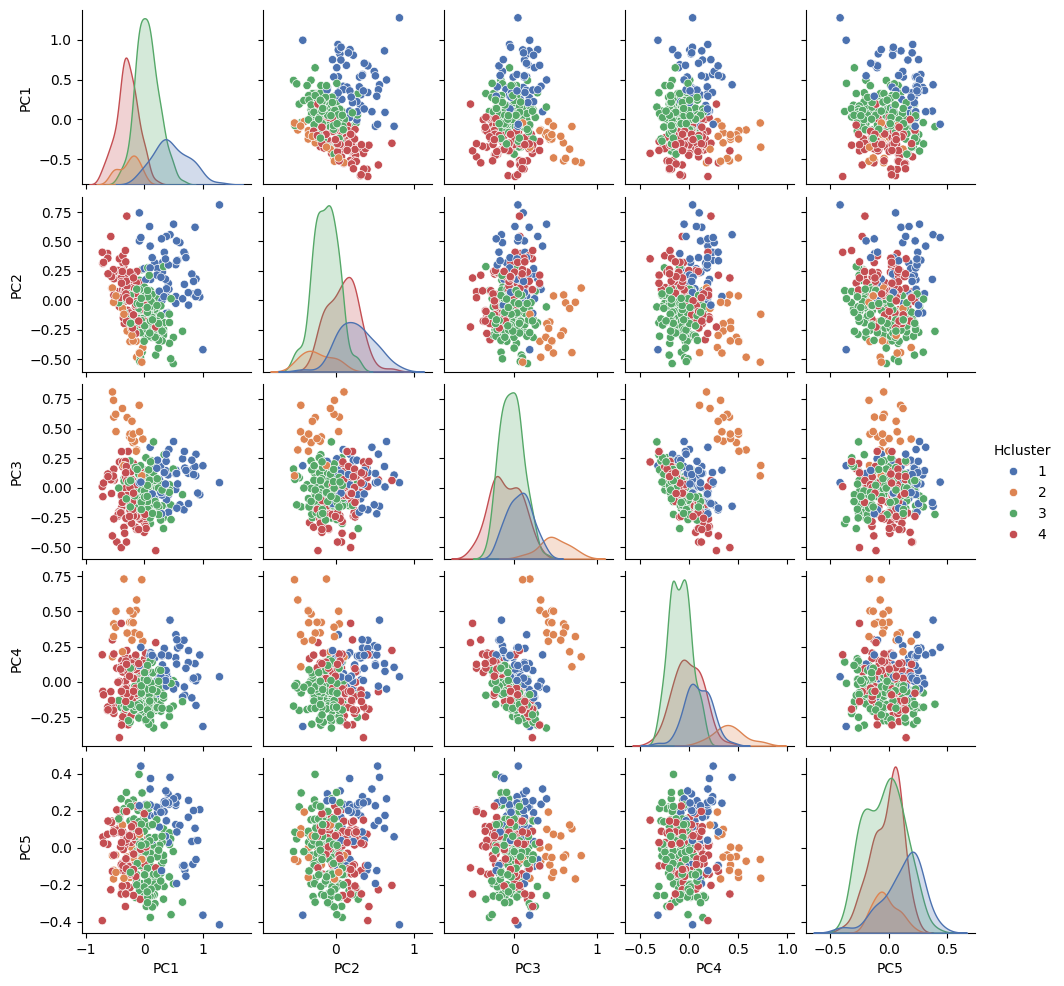

In [ ]:
sns.pairplot(pca_df.drop('KCluster', axis=1), hue='Hcluster', palette='deep', diag_kind='kde', height=2, aspect=1)
# plt.suptitle('Pairplot of Principal Components', y=1.02, fontsize=16)
plt.show()


In [ ]:
hcluster_means_summary = scaled_df.drop('KCluster',axis=1).groupby('Hcluster').mean()
hcluster_means_summary.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Bowling Analysis (Ball By Ball)/Analysis (PCA)/Hcluster Ball By Ball (PCA) Summary.csv', index=False)
hcluster_means_summary

,ES,WTS,BBI,CS,BWTS,SPS,DBI,EI,AVMS,BI
Hcluster,,,,,,,,,,
1,0.418270,0.385793,0.531280,0.447125,0.546268,0.345332,0.564046,0.307680,0.471707,0.328189
2,0.615009,0.000000,0.333667,0.000000,0.000000,0.000000,0.524660,0.443607,0.000000,0.492513
3,0.440998,0.233421,0.420647,0.566858,0.000000,0.322268,0.616780,0.340495,0.293202,0.326657
4,0.650714,0.169415,0.483822,0.714535,0.004267,0.244328,0.431131,0.476878,0.172312,0.494919


In [ ]:
hcluster_descriptive = scaled_df.drop('KCluster',axis=1).groupby('Hcluster').describe()
hcluster_descriptive.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Bowling Analysis (Ball By Ball)/Analysis (PCA)/Hcluster Descriptive.csv', index=False)
hcluster_descriptive

ES                                                              \
          count      mean       std       min       25%       50%       75%   
Hcluster                                                                      
1          58.0  0.418270  0.151546  0.000000  0.295859  0.439772  0.514727   
2          21.0  0.615009  0.150014  0.383973  0.525169  0.582865  0.784367   
3         136.0  0.440998  0.111939  0.119612  0.364951  0.448770  0.516018   
4          93.0  0.650714  0.117238  0.407863  0.577968  0.643374  0.715012   

                      WTS            ...      AVMS               BI            \
               max  count      mean  ...       75%       max  count      mean   
Hcluster                             ...                                        
1         0.772133   58.0  0.385793  ...  0.579321  1.000000   58.0  0.328189   
2         0.850026   21.0  0.000000  ...  0.000000  0.000000   21.0  0.492513   
3         0.684867  136.0  0.233421  ...  0.372512  0.664989  136.0  0.326657   
4         1.000000   93.0  0.169415  ...  0.211527  0.345311   93.0  0.494919   

                                                                      
               std       min       25%       50%       75%       max  
Hcluster                                                              
1         0.166160  0.000000  0.251590  0.327608  0.401069  0.805863  
2         0.223154  0.218216  0.354484  0.405395  0.688888  1.000000  
3         0.138695  0.000000  0.231928  0.333606  0.408252  0.693028  
4         0.183958  0.086245  0.374629  0.488883  0.631163  0.918868  

[4 rows x 80 columns]

In [ ]:
hcluster_1_data = scaled_df[h_labels==1].copy()
hcluster_1_data['Composite Score'] = (
    hcluster_1_data['BBI'] * weights['BBI'] +
    hcluster_1_data['WTS'] * weights['WTS'] +
    hcluster_1_data['CS'] * weights['CS'] +
    hcluster_1_data['EI'] * weights['EI'] +
    hcluster_1_data['DBI'] * weights['DBI'] +
    hcluster_1_data['BWTS'] * weights['BWTS'] +
    hcluster_1_data['SPS'] * weights['SPS'] +
    hcluster_1_data['ES'] * weights['ES'] +
    hcluster_1_data['AVMS'] * weights['AVMS'] +
    hcluster_1_data['BI'] * weights['BI']
)

hcluster_1_data['Bowler'] = df[h_labels==1]['Player'].values
hcluster_1_data['Team'] = df[h_labels==1]['Team'].values

ranked_hcluster = hcluster_1_data[['Bowler', 'Team', 'Composite Score']].sort_values(by='Composite Score', ascending=False)
ranked_hcluster

,Bowler,Team,Composite Score
96,C Bennett,Littletown CC Under 13,5.933566
253,Keiran Stafford,Hylton CCC Under 13,5.457310
191,Athena Elstob,Seaham Harbour CC Under 13 Purple,5.333594
275,Thomas Marshall,Philadelphia CC Under 13,5.213014
285,Sophie Stoker,Seaham Harbour CC Under 13 Purple,5.174099
49,Dylan Lynn,"Brandon CC, Durham Under 13",5.067583
92,Logan Reay,Eppleton CC Under 13,5.019718
197,S Howe,Seaham Park CC Under 13 B,4.991163
274,J Gibson,Littletown CC Under 13,4.961257
141,Alex Garthwaite,"Washington CC, Durham Washington U13 Nova",4.905242


In [ ]:
ranked_hcluster['Rank'] = range(1, len(ranked_hcluster) + 1)
ranked_hcluster = ranked_hcluster[['Rank', 'Bowler', 'Team', 'Composite Score']]
ranked_hcluster

,Rank,Bowler,Team,Composite Score
96,1,C Bennett,Littletown CC Under 13,5.933566
253,2,Keiran Stafford,Hylton CCC Under 13,5.457310
191,3,Athena Elstob,Seaham Harbour CC Under 13 Purple,5.333594
275,4,Thomas Marshall,Philadelphia CC Under 13,5.213014
285,5,Sophie Stoker,Seaham Harbour CC Under 13 Purple,5.174099
49,6,Dylan Lynn,"Brandon CC, Durham Under 13",5.067583
92,7,Logan Reay,Eppleton CC Under 13,5.019718
197,8,S Howe,Seaham Park CC Under 13 B,4.991163
274,9,J Gibson,Littletown CC Under 13,4.961257
141,10,Alex Garthwaite,"Washington CC, Durham Washington U13 Nova",4.905242


In [ ]:
ranked_hcluster.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Bowling Analysis (Ball By Ball)/Analysis (PCA)/Bowler Ranking Hierarchical Ball By Ball (PCA).csv', index=False)

In [ ]:
scaled_df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Bowling Analysis (Ball By Ball)/EDA/Bowling Performance Metrics (Ball By Ball) - Scaled with clusters.csv', index=False)
df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Bowling Analysis (Ball By Ball)/EDA/Bowling Performance Metrics (Ball By Ball) with clusters.csv', index=False)
pca_df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Ball By Ball Analysis/Bowling Analysis (Ball By Ball)/EDA/Bowling Performance Metrics (Ball By Ball) - PCA with clusters.csv', index=False)